In [ ]:
import pandas as pd
import requests

dataset_url = 'Global YouTube Statistics.csv'
dataset_path = '/Global YouTube Statistics.csv'



# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(dataset_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(dataset_path, encoding='ISO-8859-1')


# Display the first 5 rows and the columns and their data types
print("Dataset loaded successfully!")
display(df.head())
display(df.info())

Dataset loaded successfully!


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

None

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                    

In [ ]:
# Fill missing values in categorical columns with the mode
categorical_cols = ['category', 'Country', 'Abbreviation', 'channel_type', 'created_month']
for col in categorical_cols:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

# Fill missing values in numerical columns with the median
numerical_cols_to_fill = [
    'video_views_rank',
    'country_rank',
    'channel_type_rank',
    'video_views_for_the_last_30_days',
    'created_year',
    'created_date',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Unemployment rate',
    'Urban_population',
    'Latitude',
    'Longitude'
]
for col in numerical_cols_to_fill:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Drop the 'subscribers_for_last_30_days' column due to a high number of missing values
if 'subscribers_for_last_30_days' in df.columns:
    df.drop('subscribers_for_last_30_days', axis=1, inplace=True)


print("Missing values handled.")

Missing values handled.


/tmp/ipython-input-1389225282.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-1389225282.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# Check for missing values again
missing_values_after_handling = df.isnull().sum()
print("Missing values per column after handling:")
print(missing_values_after_handling)

Missing values per column after handling:
rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
created_year                               0
created_month                              0
created_date                               0
Gross tertiar

In [ ]:
# Check the data type of the 'rank' column
print(f"Data type of 'rank' column: {df['rank'].dtype}")

# Check the number of unique values in the 'rank' column
print(f"Number of unique values in 'rank' column: {df['rank'].nunique()}")

# Display the unique values and their counts to see if there are duplicates
print("\nValue counts for 'rank' column:")
display(df['rank'].value_counts().head()) # Display the most frequent values

Data type of 'rank' column: int64
Number of unique values in 'rank' column: 995

Value counts for 'rank' column:


,count
rank,
995,1
1,1
2,1
979,1
978,1


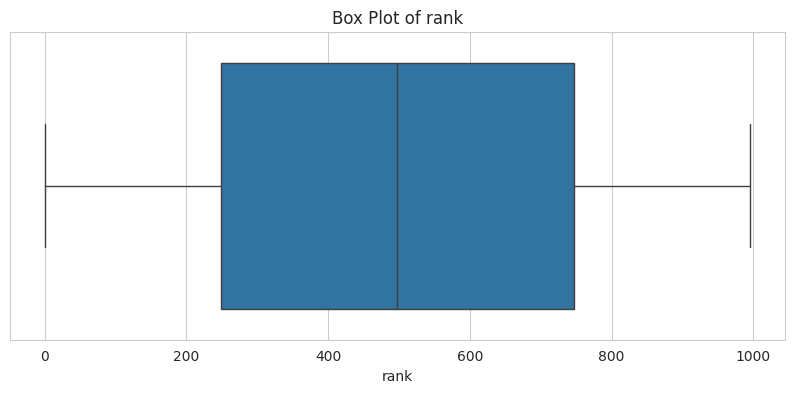

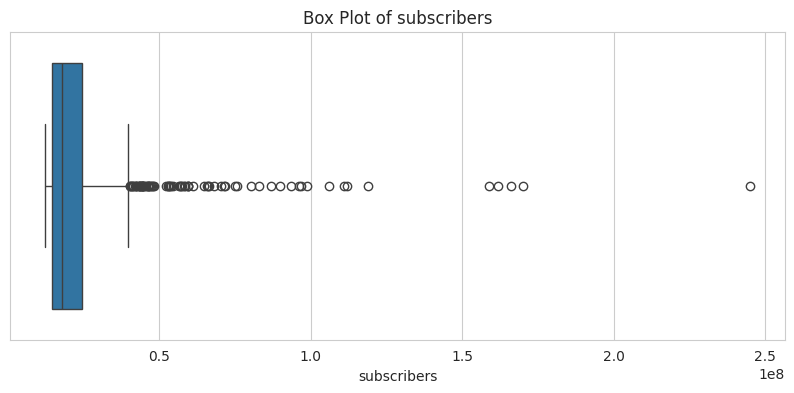

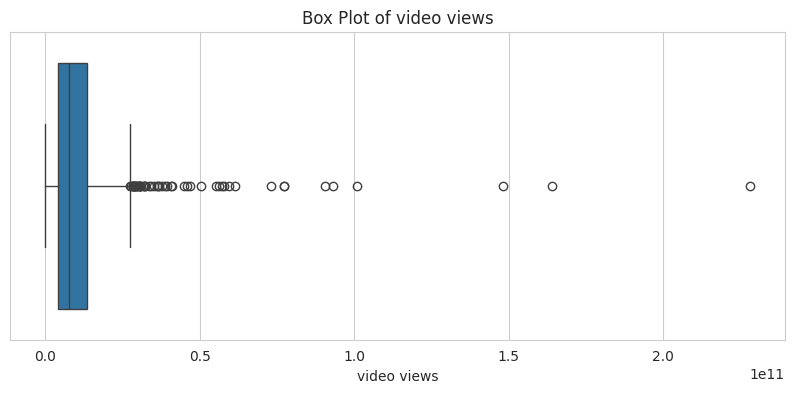

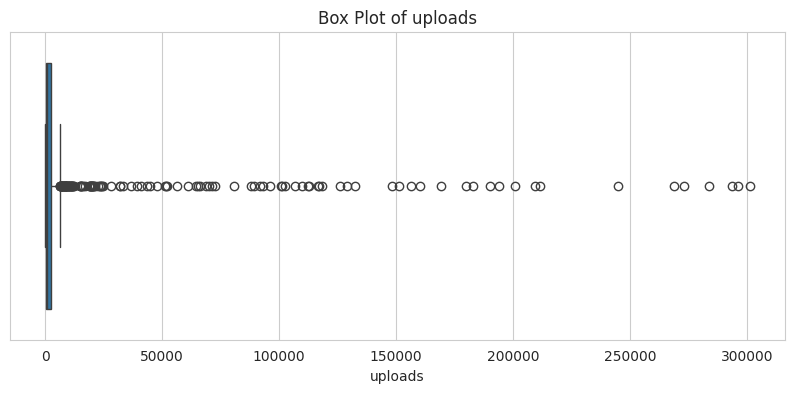

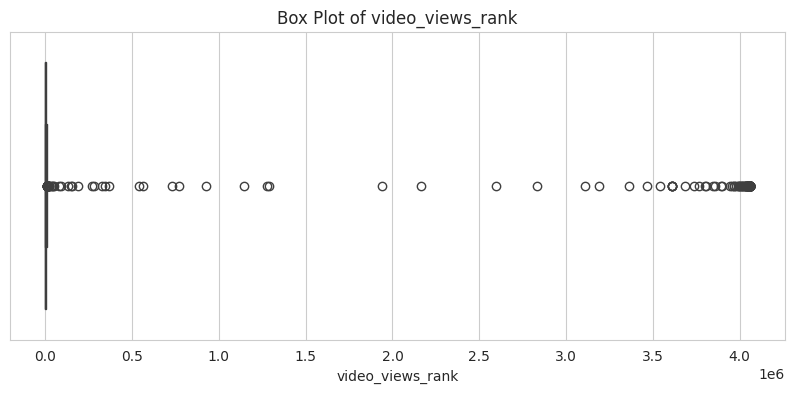

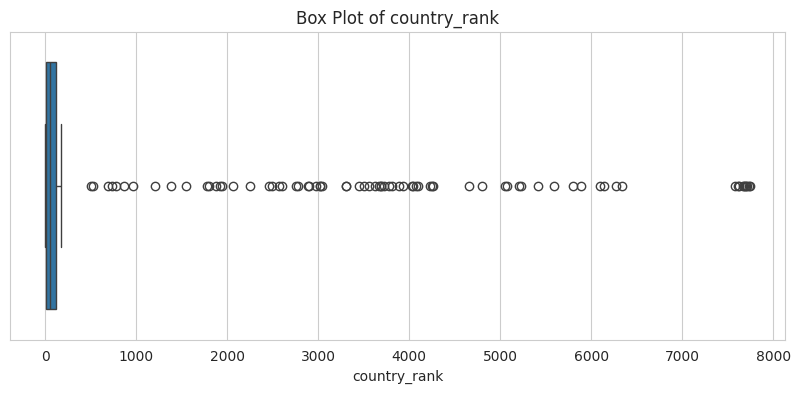

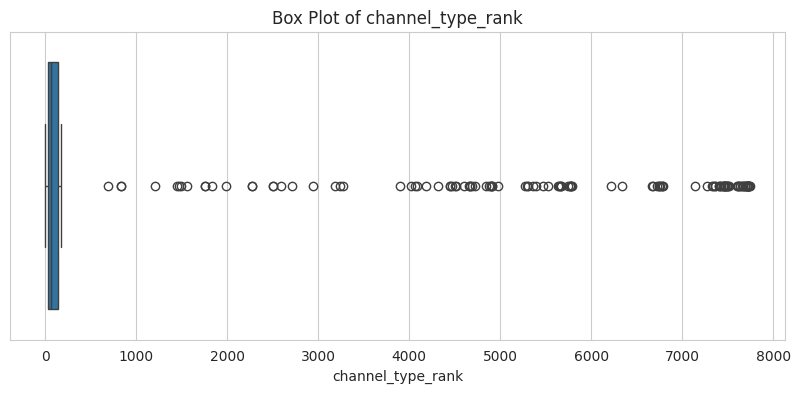

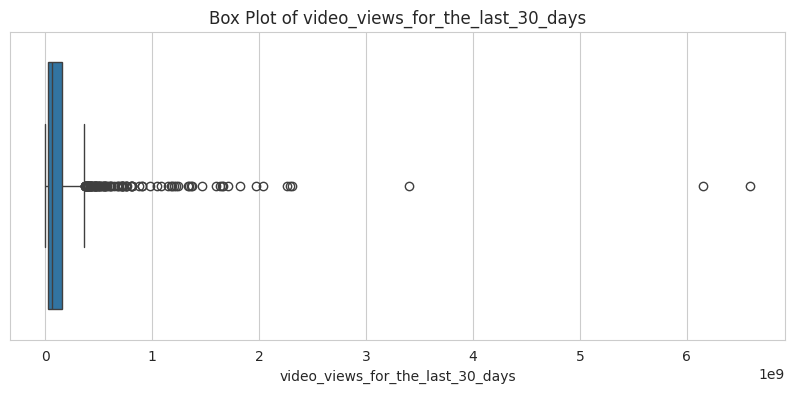

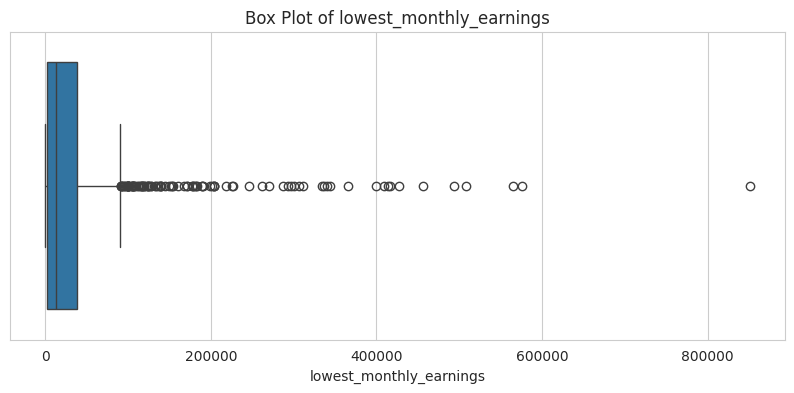

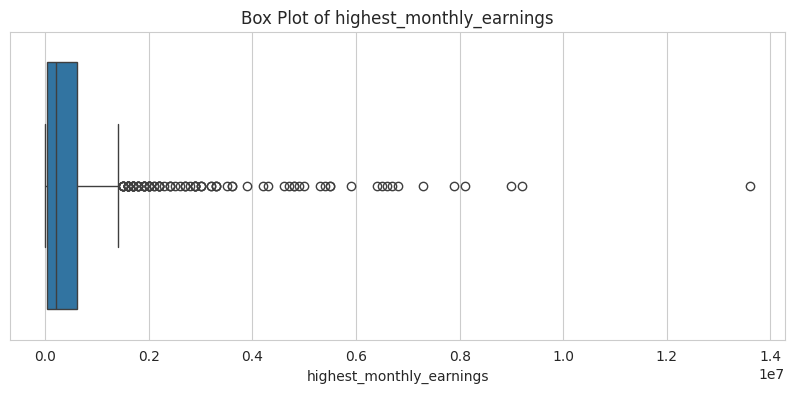

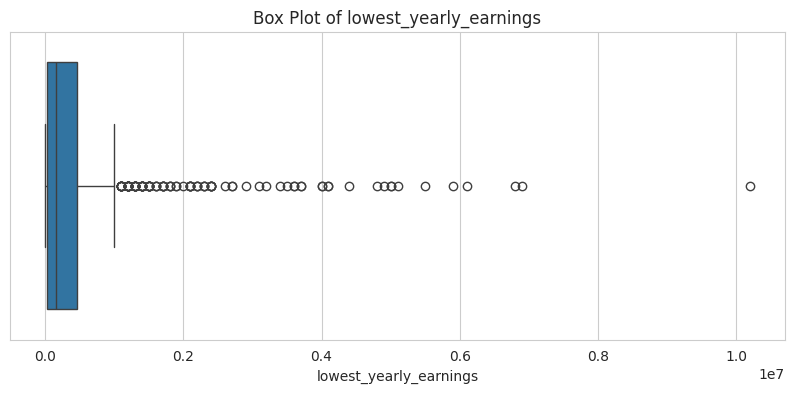

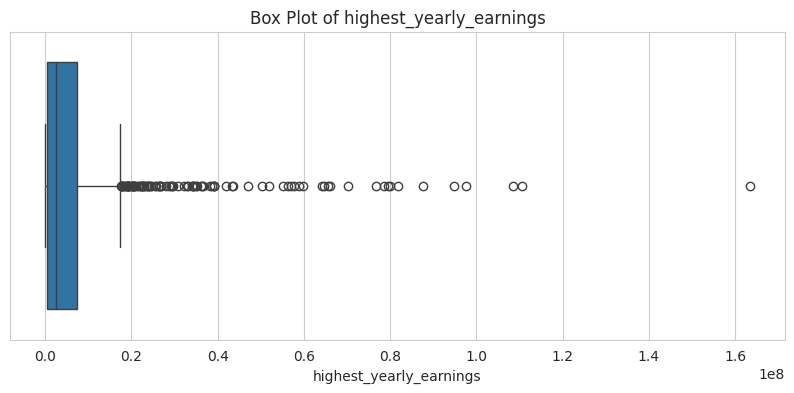

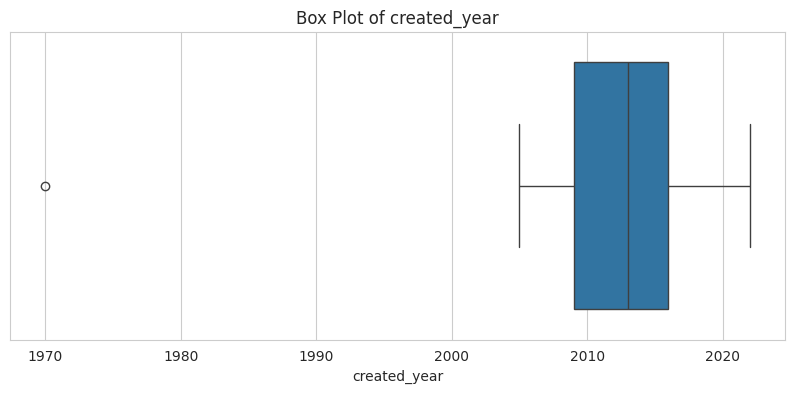

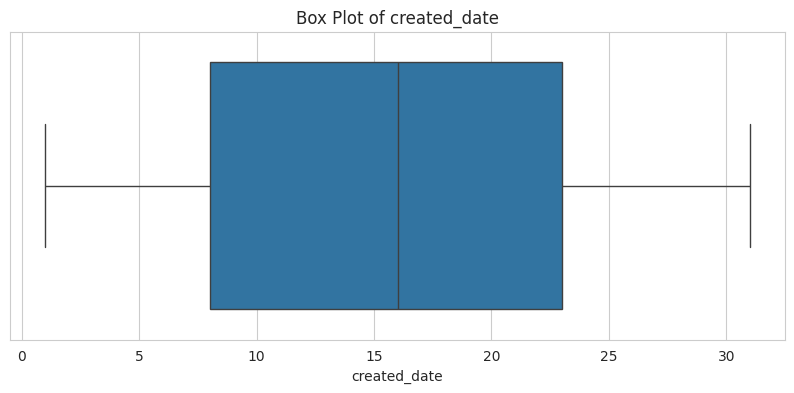

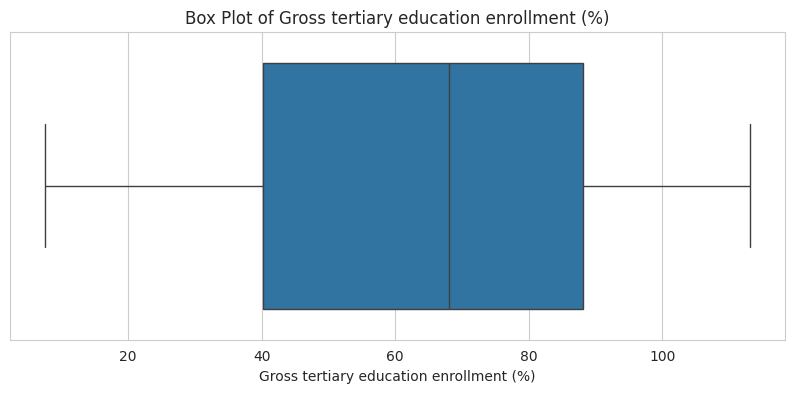

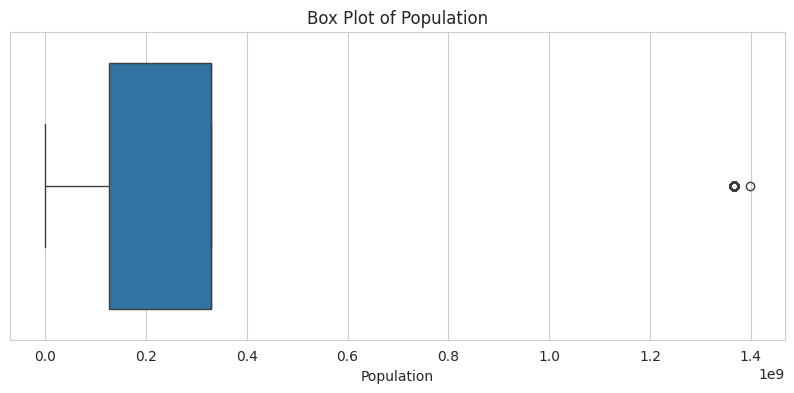

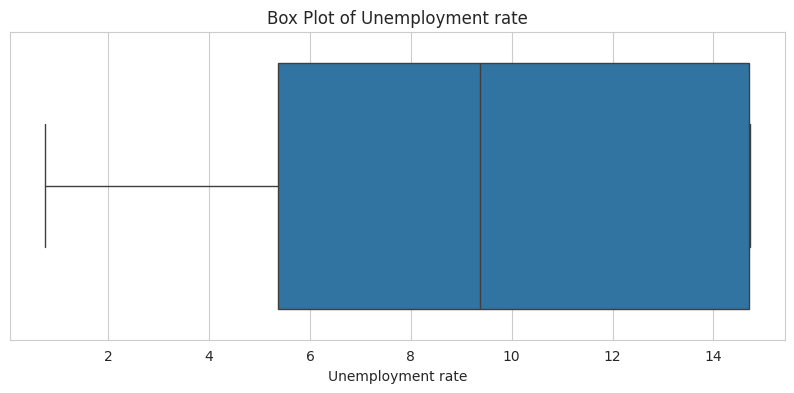

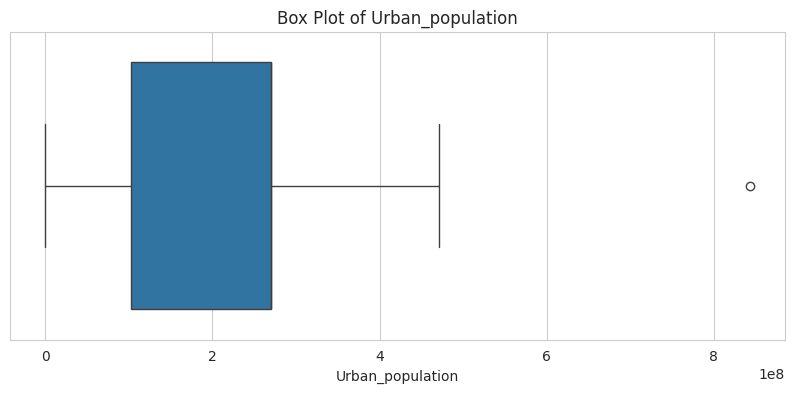

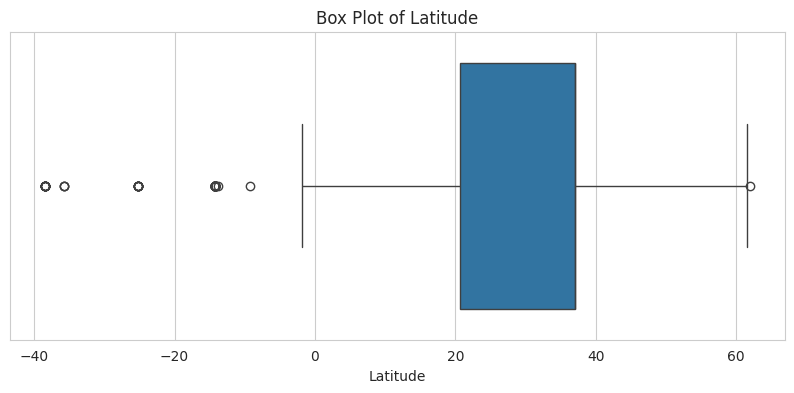

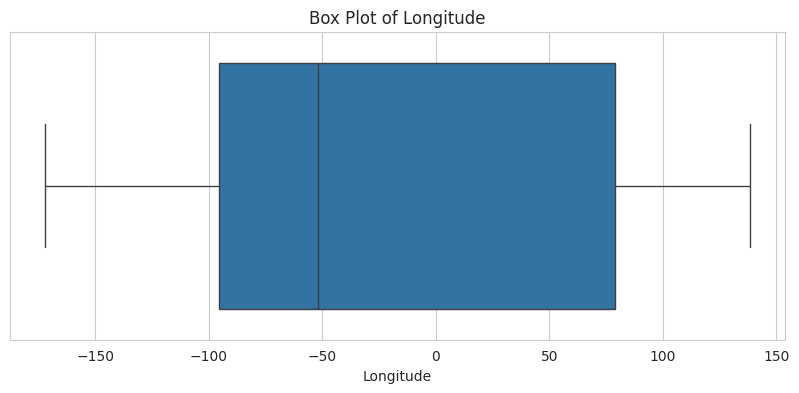

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the style for the plots
sns.set_style("whitegrid")

# Create box plots for each numerical column to visualize outliers
# We'll do this in a loop, creating a separate plot for each column
for col in numerical_cols:
    plt.figure(figsize=(10, 4)) # Adjust figure size as needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nFirst 5 duplicate rows:")
    display(duplicate_rows.head())
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and display summary statistics
display(numerical_df.describe())

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,995.00000,995.000000,9.950000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,995.000000,995.000000,9.950000e+02,995.000000,9.950000e+02,995.000000,995.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.536928e+05,346.99196,723.159296,1.693335e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,2012.632161,15.747739,64.168241,4.177600e+08,9.289874,2.299568e+08,27.925514,-18.800556
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362209e+06,1163.09926,1915.718317,4.052958e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,4.501215,8.755434,24.480683,4.438532e+08,4.576008,1.456064e+08,19.552101,80.313810
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.00000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.240000e+02,14.00000,28.000000,2.232300e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,2009.000000,8.000000,40.200000,1.260140e+08,5.360000,1.026269e+08,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.00000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.579000e+03,114.00000,137.000000,1.585655e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.00000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


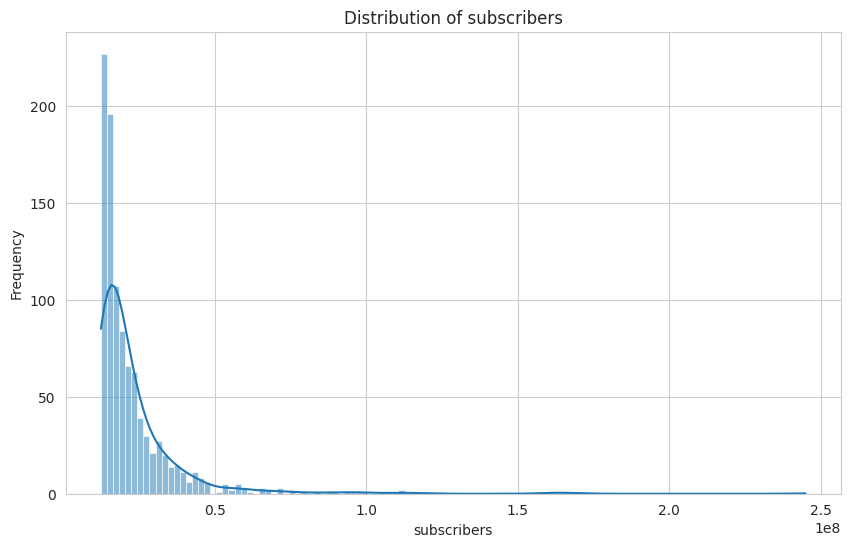

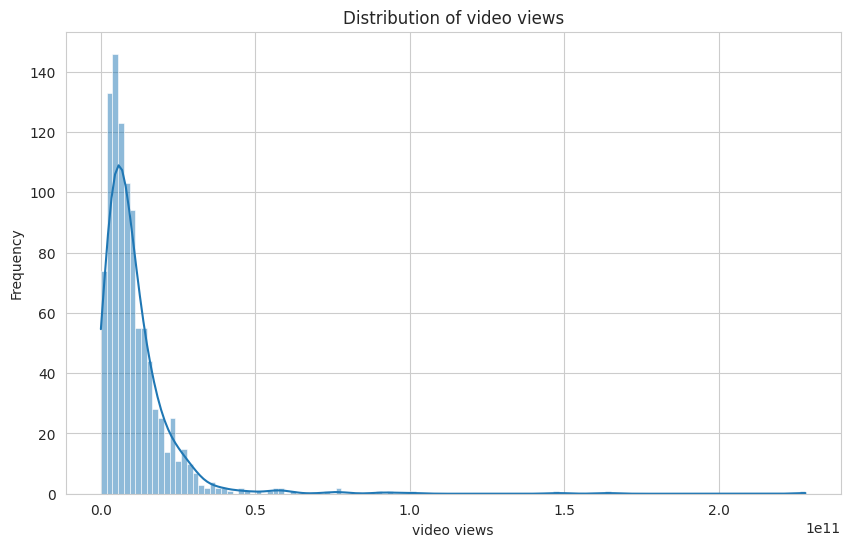

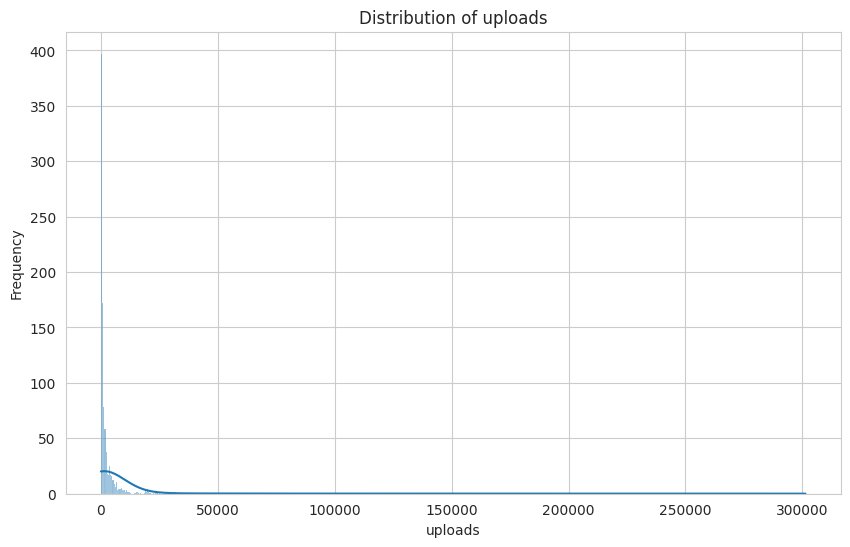

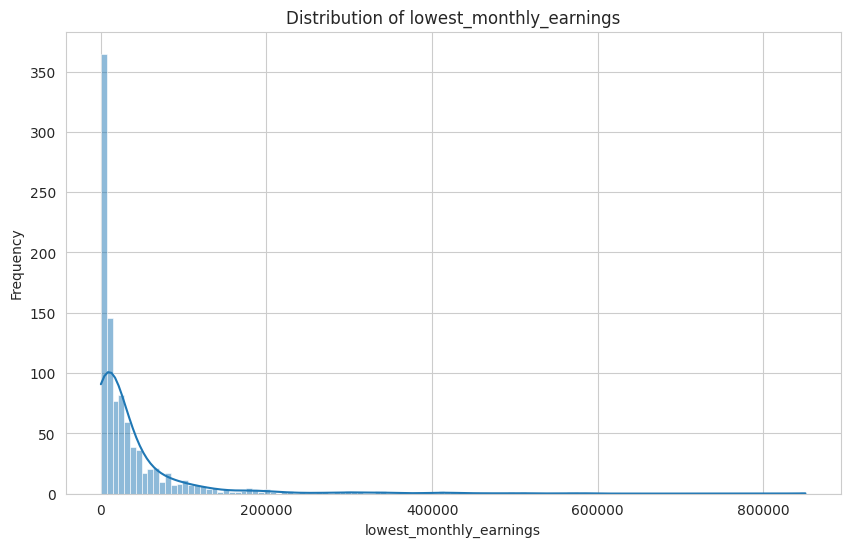

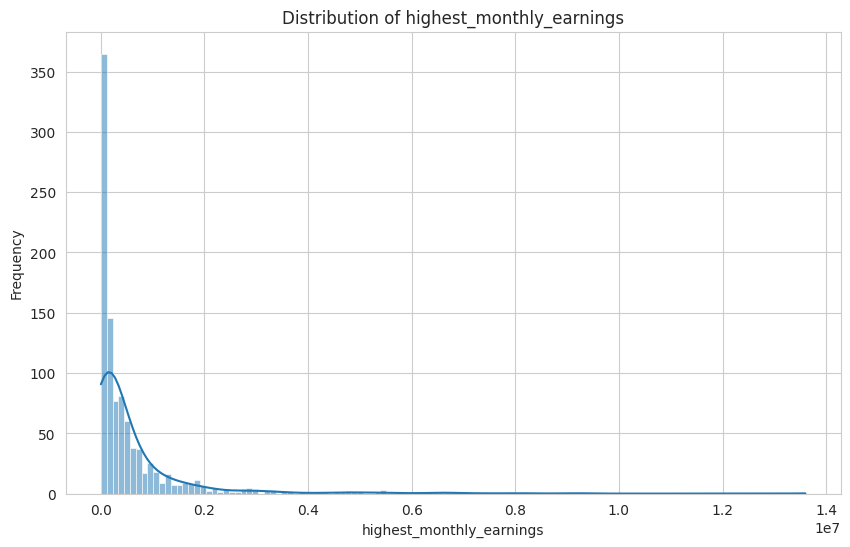

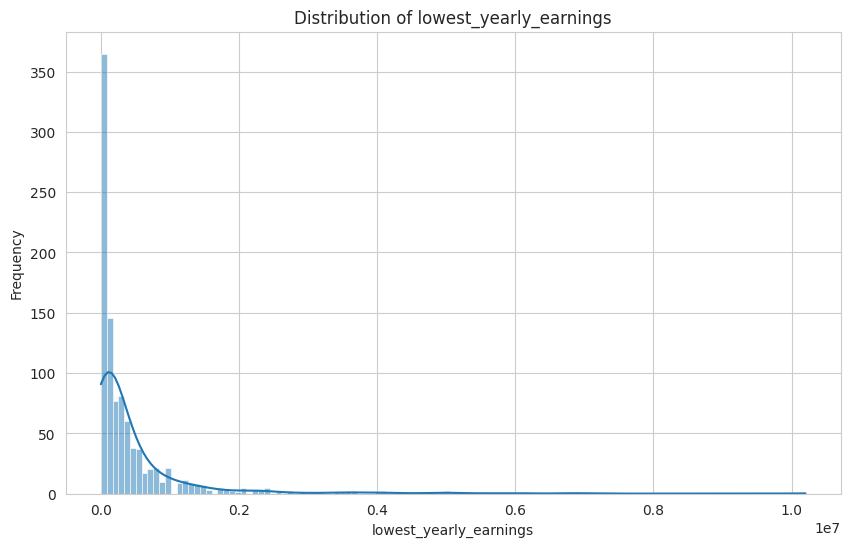

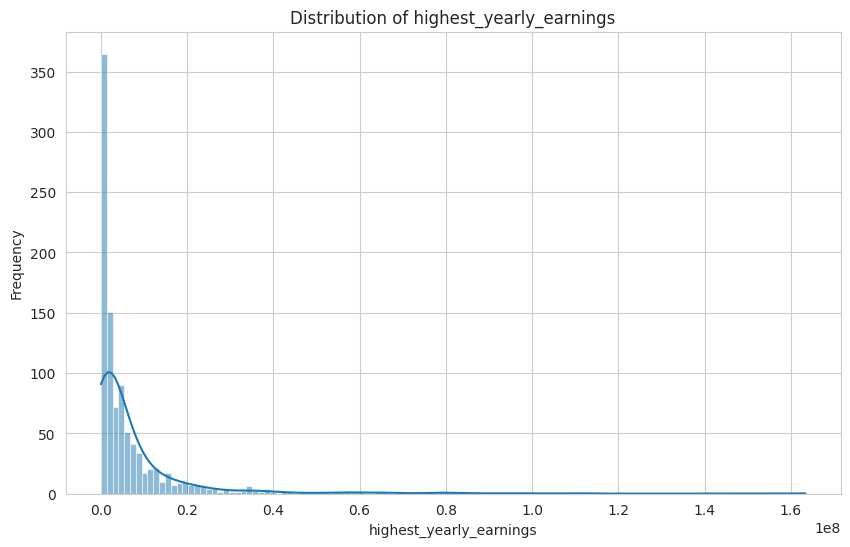

In [ ]:
# Select relevant numerical columns for visualization
numerical_cols_for_viz = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']

# Create distribution plots for each selected numerical column
for col in numerical_cols_for_viz:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())


Value counts for 'Youtuber':


,count
Youtuber,
Make Joke Of,1
T-Series,1
YouTube Movies,1
Heidi and Zidane HZHtube,1
Timba Vk,1
...,...
PewDiePie,1
ýýý Kids Diana Show,1
Music,1



Value counts for 'category':


,count
category,
Entertainment,287
Music,202
People & Blogs,132
Gaming,94
Comedy,69
Film & Animation,46
Education,45
Howto & Style,40
News & Politics,26



Value counts for 'Title':


,count
Title,
Preston,2
#Refugio Mental,2
Like Nastya Vlog,2
PowerfulJRE,1
Ranz Kyle,1
...,...
tlnovelas,1
Claudio,1
INVICTOR,1



Value counts for 'Country':


,count
Country,
United States,435
India,168
Brazil,62
United Kingdom,43
Mexico,33
Indonesia,28
Spain,22
Thailand,18
South Korea,17



Value counts for 'Abbreviation':


,count
Abbreviation,
US,435
IN,168
BR,62
GB,43
MX,33
ID,28
ES,22
TH,18
KR,17



Value counts for 'channel_type':


,count
channel_type,
Entertainment,334
Music,216
People,101
Games,98
Comedy,51
Education,49
Film,42
Howto,36
News,30



Value counts for 'created_month':


,count
created_month,
Jan,106
Sep,96
Jul,91
Nov,90
Mar,87
May,84
Aug,82
Oct,78
Jun,73


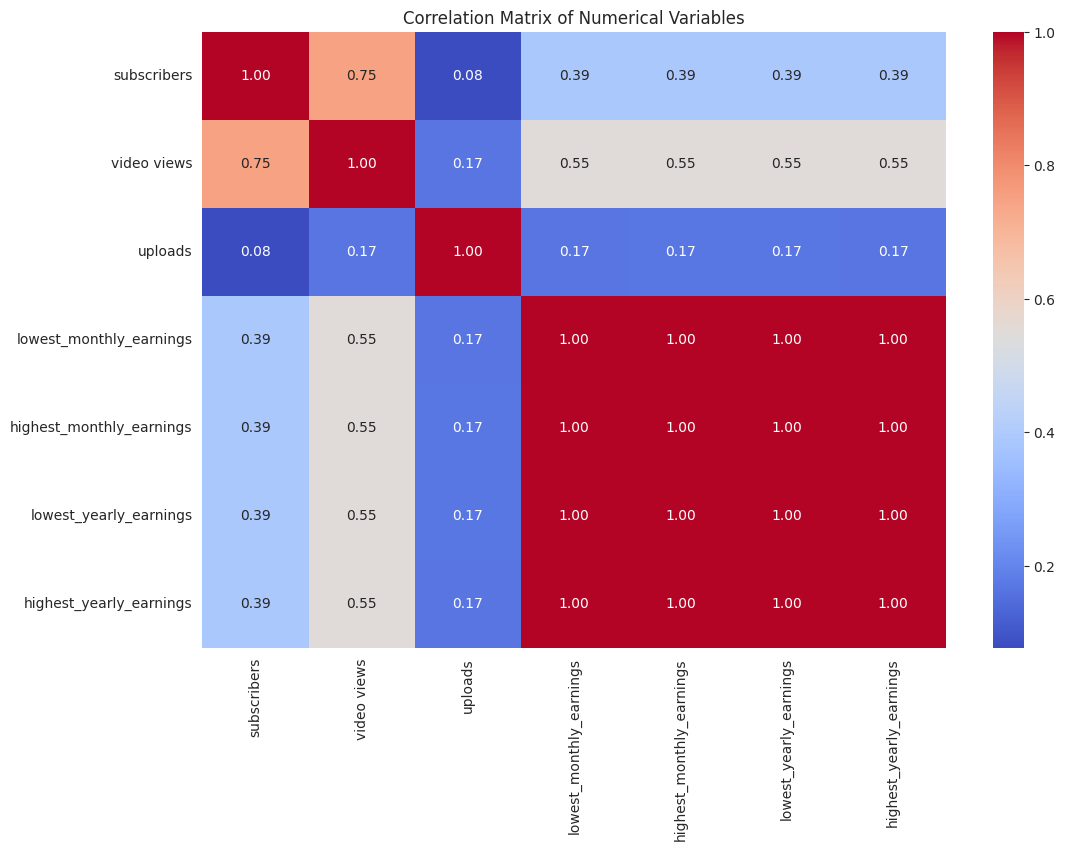

In [ ]:
# Select the numerical columns for correlation analysis
correlation_cols = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

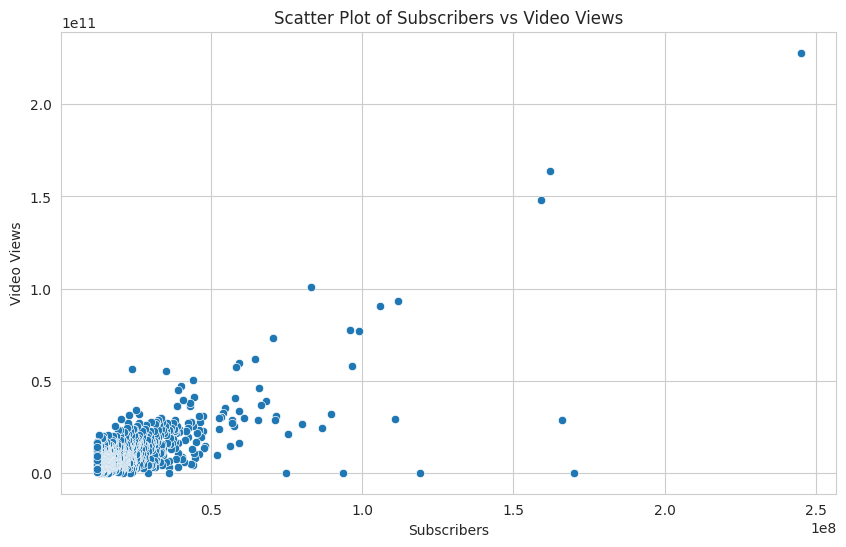

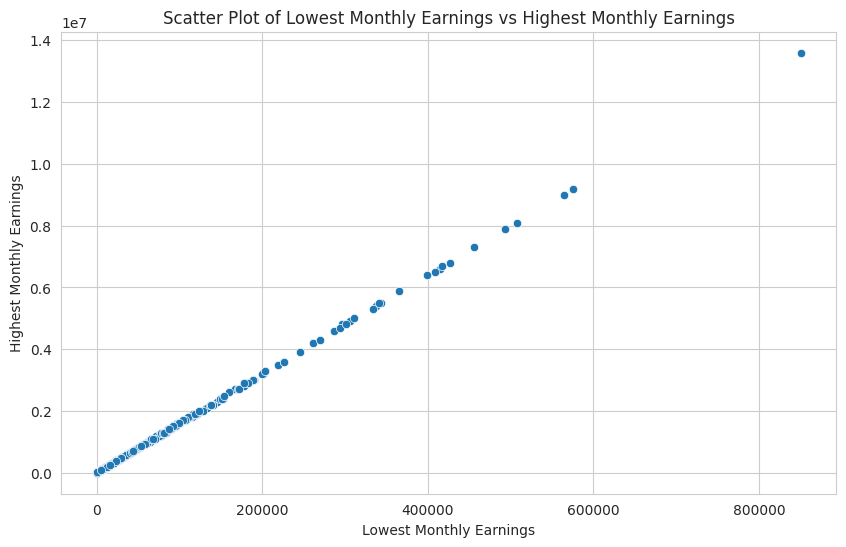

In [ ]:
# Create scatter plots for pairs with strong positive correlations

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subscribers', y='video views')
plt.title('Scatter Plot of Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lowest_monthly_earnings', y='highest_monthly_earnings')
plt.title('Scatter Plot of Lowest Monthly Earnings vs Highest Monthly Earnings')
plt.xlabel('Lowest Monthly Earnings')
plt.ylabel('Highest Monthly Earnings')
plt.show()

In [ ]:
# 1. Top 10 channels based on subscribers
top_10_channels_subscribers = df.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
print("Top 10 Channels by Subscribers:")
display(top_10_channels_subscribers)

# 2. Top 10 countries based on total subscribers
top_10_countries_subscribers = df.groupby('Country')['subscribers'].sum().nlargest(10).reset_index()
print("\nTop 10 Countries by Total Subscribers:")
display(top_10_countries_subscribers)

# 3. Top 10 categories based on total video views
top_10_categories_views = df.groupby('category')['video views'].sum().nlargest(10).reset_index()
print("\nTop 10 Categories by Total Video Views:")
display(top_10_categories_views)

Top 10 Channels by Subscribers:


,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000



Top 10 Countries by Total Subscribers:


,Country,subscribers
0,United States,10251700000
1,India,4310600000
2,Brazil,1221800000
3,United Kingdom,917400000
4,Mexico,626900000
5,Indonesia,534100000
6,South Korea,481700000
7,Russia,407200000
8,Thailand,386500000
9,Spain,385100000



Top 10 Categories by Total Video Views:


,category,video views
0,Music,3.121478e+12
1,Entertainment,2.832383e+12
2,People & Blogs,1.265791e+12
3,Gaming,7.176389e+11
4,Education,6.966145e+11
5,Comedy,5.501128e+11
6,Film & Animation,5.444225e+11
7,Shows,4.462068e+11
8,News & Politics,2.703919e+11
9,Howto & Style,2.018175e+11


In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and display summary statistics
display(numerical_df.describe())

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,995.00000,995.000000,9.950000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,995.000000,995.000000,9.950000e+02,995.000000,9.950000e+02,995.000000,995.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.536928e+05,346.99196,723.159296,1.693335e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,2012.632161,15.747739,64.168241,4.177600e+08,9.289874,2.299568e+08,27.925514,-18.800556
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362209e+06,1163.09926,1915.718317,4.052958e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,4.501215,8.755434,24.480683,4.438532e+08,4.576008,1.456064e+08,19.552101,80.313810
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.00000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.240000e+02,14.00000,28.000000,2.232300e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,2009.000000,8.000000,40.200000,1.260140e+08,5.360000,1.026269e+08,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.00000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.579000e+03,114.00000,137.000000,1.585655e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.00000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


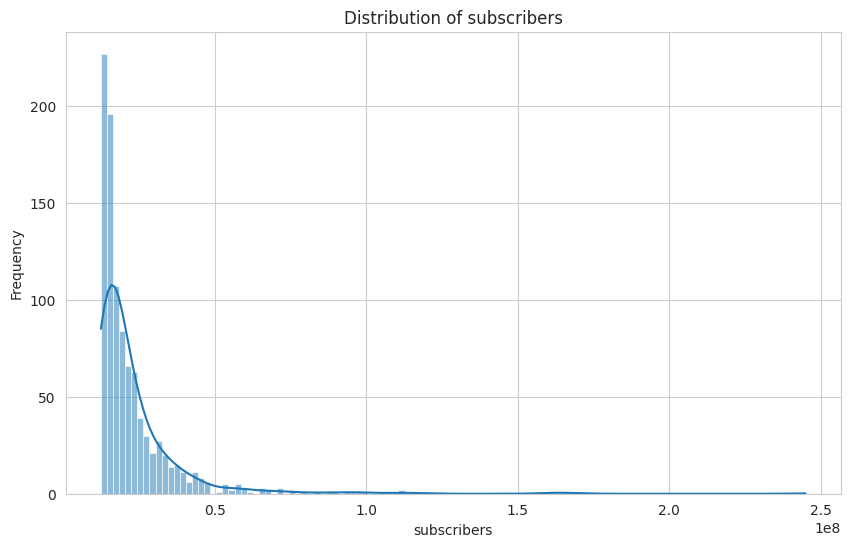

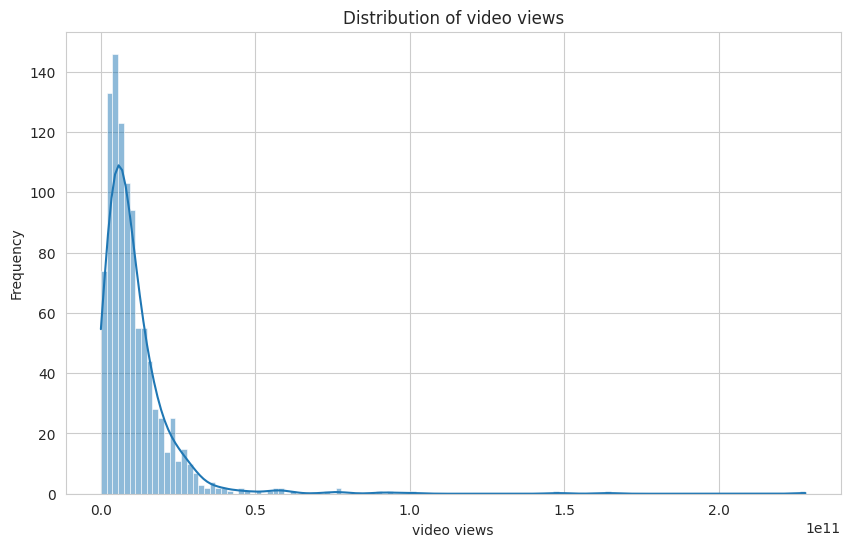

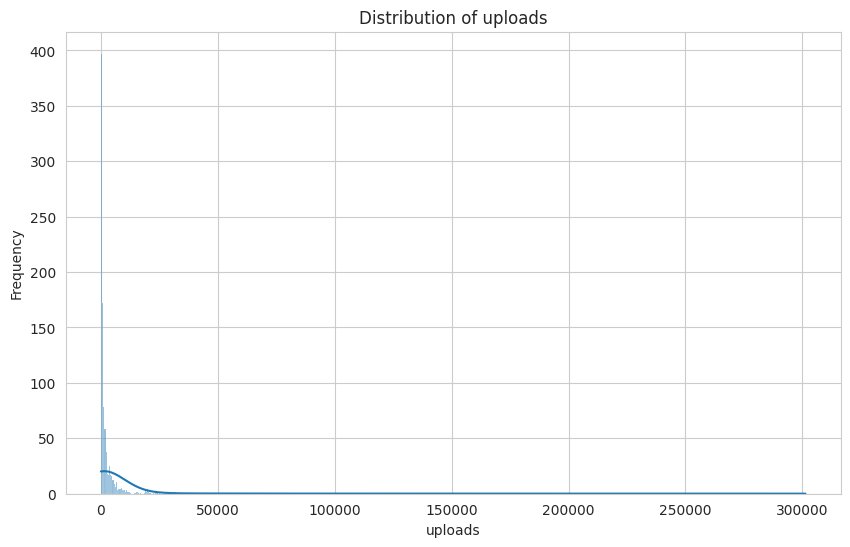

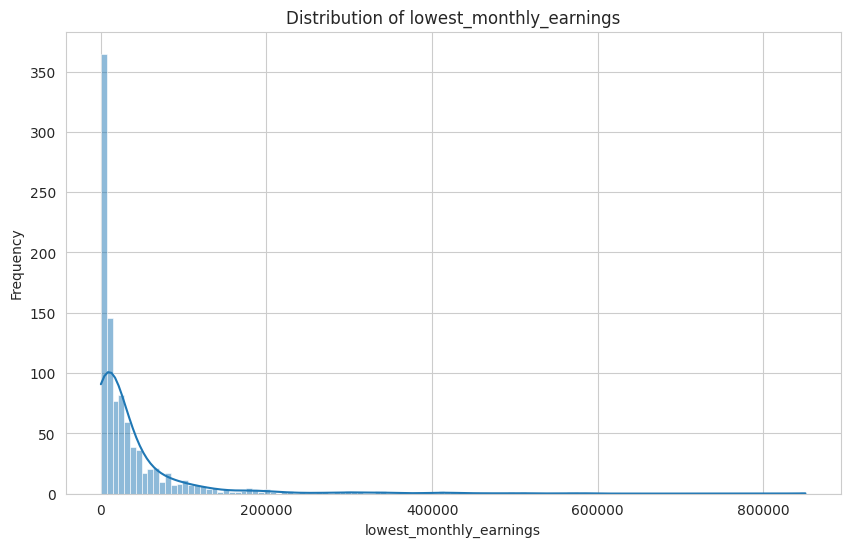

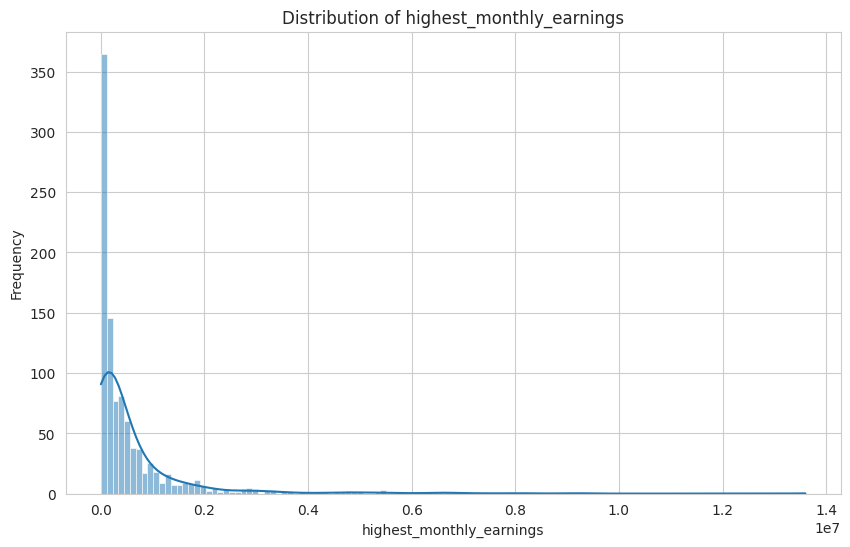

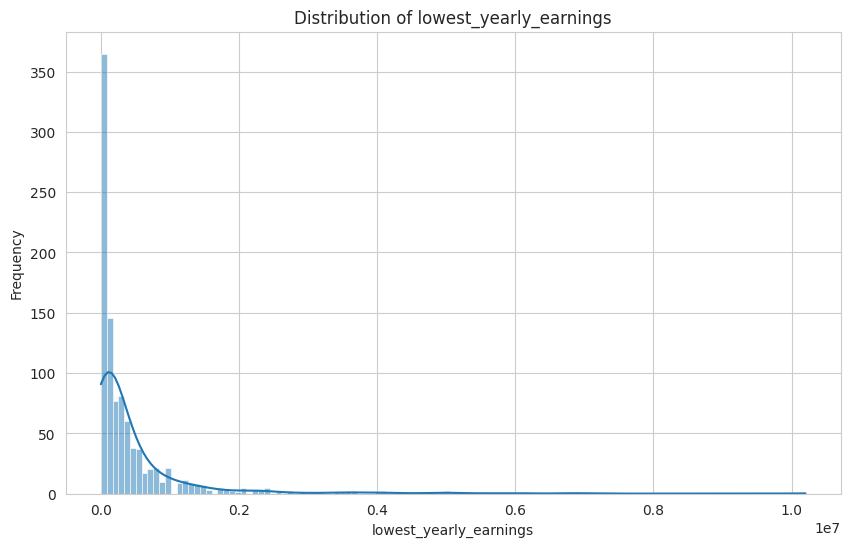

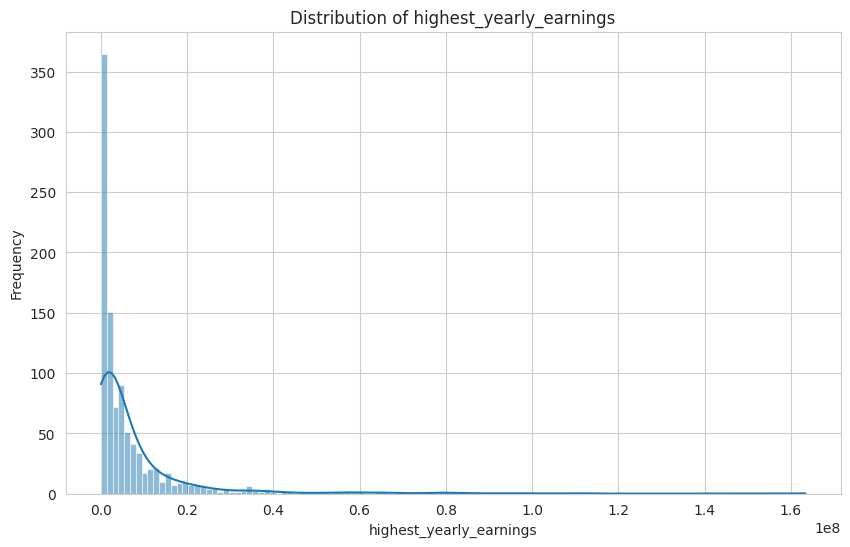

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns for visualization
numerical_cols_for_viz = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']

# Create distribution plots for each selected numerical column
for col in numerical_cols_for_viz:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())


Value counts for 'Youtuber':


,count
Youtuber,
Make Joke Of,1
T-Series,1
YouTube Movies,1
Heidi and Zidane HZHtube,1
Timba Vk,1
...,...
PewDiePie,1
ýýý Kids Diana Show,1
Music,1



Value counts for 'category':


,count
category,
Entertainment,287
Music,202
People & Blogs,132
Gaming,94
Comedy,69
Film & Animation,46
Education,45
Howto & Style,40
News & Politics,26



Value counts for 'Title':


,count
Title,
Preston,2
#Refugio Mental,2
Like Nastya Vlog,2
PowerfulJRE,1
Ranz Kyle,1
...,...
tlnovelas,1
Claudio,1
INVICTOR,1



Value counts for 'Country':


,count
Country,
United States,435
India,168
Brazil,62
United Kingdom,43
Mexico,33
Indonesia,28
Spain,22
Thailand,18
South Korea,17



Value counts for 'Abbreviation':


,count
Abbreviation,
US,435
IN,168
BR,62
GB,43
MX,33
ID,28
ES,22
TH,18
KR,17



Value counts for 'channel_type':


,count
channel_type,
Entertainment,334
Music,216
People,101
Games,98
Comedy,51
Education,49
Film,42
Howto,36
News,30



Value counts for 'created_month':


,count
created_month,
Jan,106
Sep,96
Jul,91
Nov,90
Mar,87
May,84
Aug,82
Oct,78
Jun,73


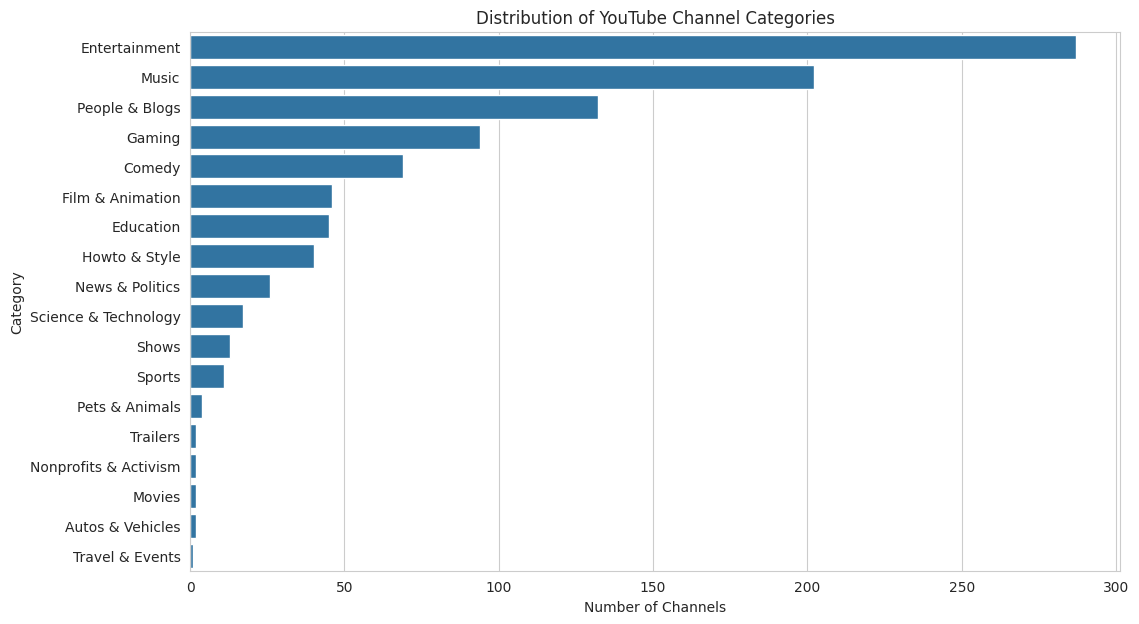

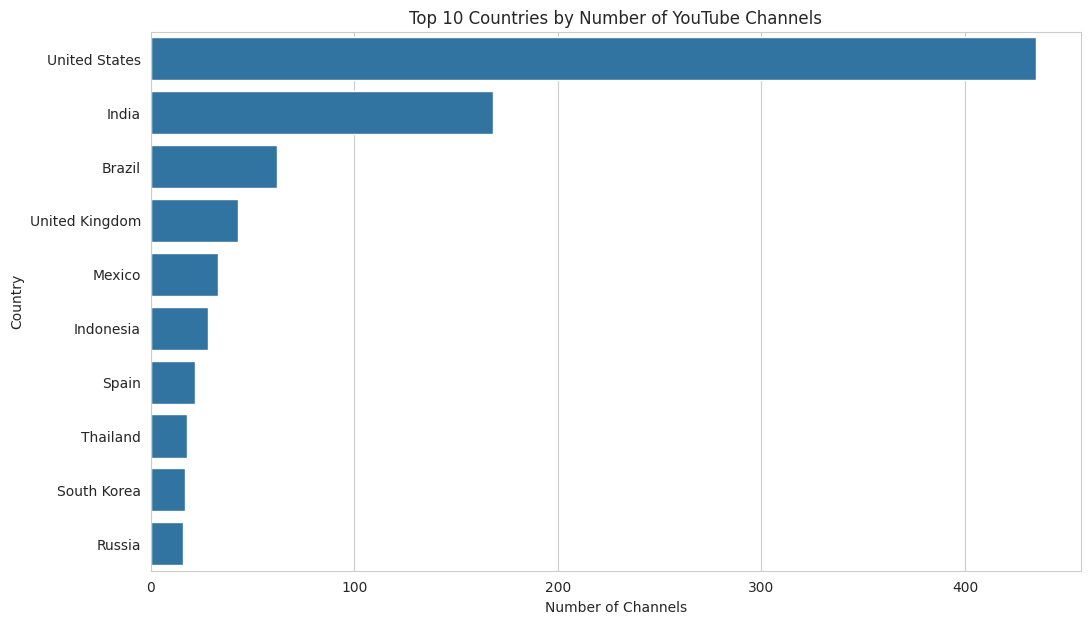

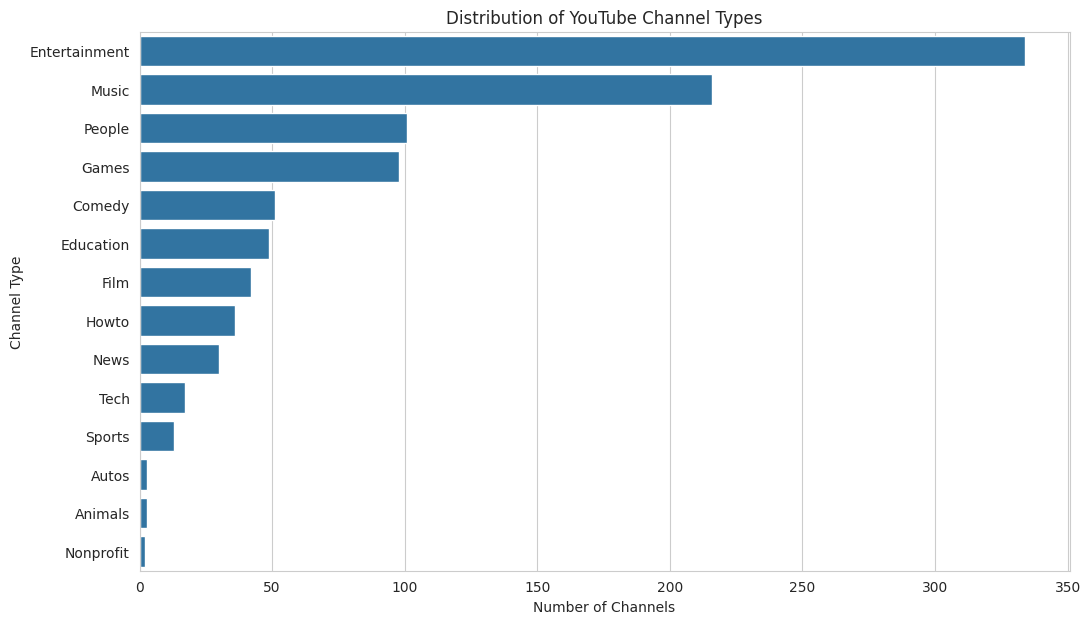

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Visualize the top categories
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Distribution of YouTube Channel Categories')
plt.xlabel('Number of Channels')
plt.ylabel('Category')
# Insight: Identify the most popular and least popular categories based on the number of channels.
plt.show()

# Visualize the top countries (considering the top N for better readability)
plt.figure(figsize=(12, 7))
# Select top 10 countries for visualization
top_countries = df['Country'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Country'].isin(top_countries)], y='Country', order=top_countries)
plt.title('Top 10 Countries by Number of YouTube Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
# Insight: See which countries have the highest representation of YouTubers in this dataset.
plt.show()

# Visualize the top channel types
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='channel_type', order=df['channel_type'].value_counts().index)
plt.title('Distribution of YouTube Channel Types')
plt.xlabel('Number of Channels')
plt.ylabel('Channel Type')
# Insight: Understand the most common types of YouTube channels.
plt.show()

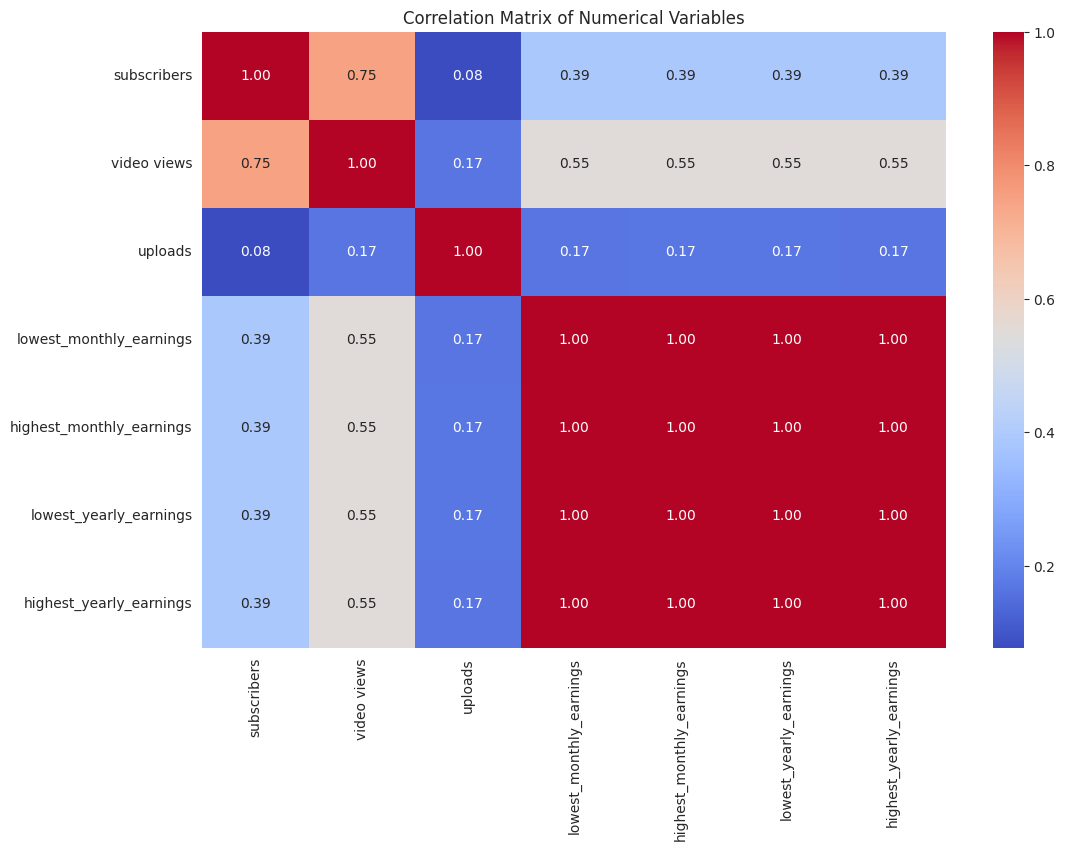

In [ ]:
# Select the numerical columns for correlation analysis
correlation_cols = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
# Insight: Identify which numerical variables have strong positive or negative correlations.
# For example, high positive correlation between earnings columns is expected.
plt.show()

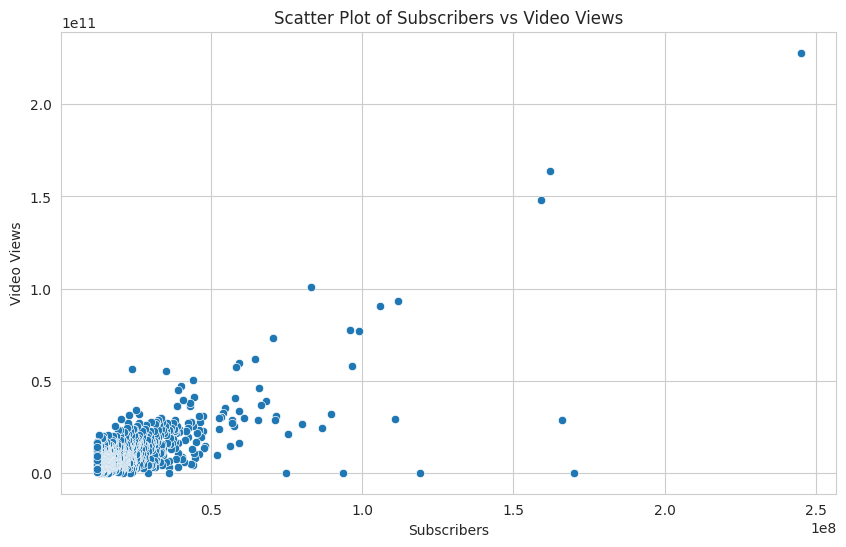

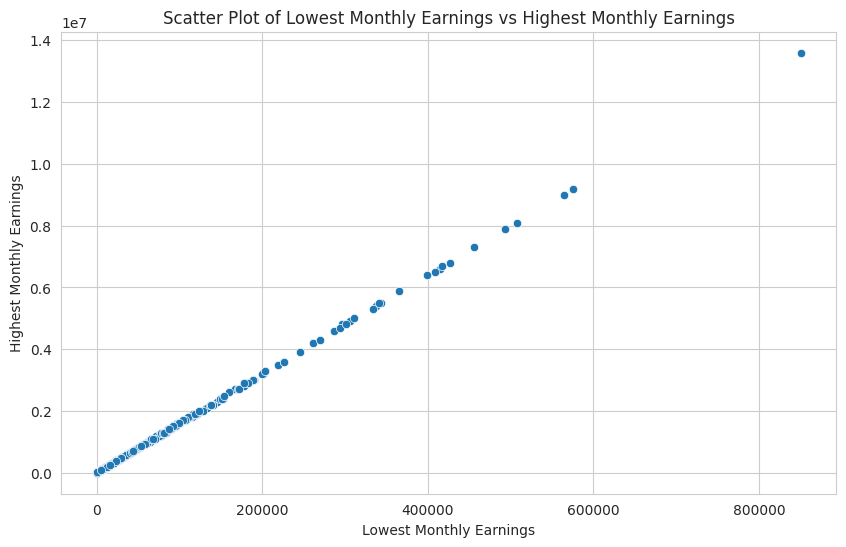

In [ ]:
# Create scatter plots for pairs with strong positive correlations

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subscribers', y='video views')
plt.title('Scatter Plot of Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lowest_monthly_earnings', y='highest_monthly_earnings')
plt.title('Scatter Plot of Lowest Monthly Earnings vs Highest Monthly Earnings')
plt.xlabel('Lowest Monthly Earnings')
plt.ylabel('Highest Monthly Earnings')
plt.show()

In [ ]:
# 1. Top 10 channels based on subscribers
top_10_channels_subscribers = df.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
print("Top 10 Channels by Subscribers:")
display(top_10_channels_subscribers)

# 2. Top 10 countries based on total subscribers
top_10_countries_subscribers = df.groupby('Country')['subscribers'].sum().nlargest(10).reset_index()
print("\nTop 10 Countries by Total Subscribers:")
display(top_10_countries_subscribers)

# 3. Top 10 categories based on total video views
top_10_categories_views = df.groupby('category')['video views'].sum().nlargest(10).reset_index()
print("\nTop 10 Categories by Total Video Views:")
display(top_10_categories_views)

Top 10 Channels by Subscribers:


,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000



Top 10 Countries by Total Subscribers:


,Country,subscribers
0,United States,10251700000
1,India,4310600000
2,Brazil,1221800000
3,United Kingdom,917400000
4,Mexico,626900000
5,Indonesia,534100000
6,South Korea,481700000
7,Russia,407200000
8,Thailand,386500000
9,Spain,385100000



Top 10 Categories by Total Video Views:


,category,video views
0,Music,3.121478e+12
1,Entertainment,2.832383e+12
2,People & Blogs,1.265791e+12
3,Gaming,7.176389e+11
4,Education,6.966145e+11
5,Comedy,5.501128e+11
6,Film & Animation,5.444225e+11
7,Shows,4.462068e+11
8,News & Politics,2.703919e+11
9,Howto & Style,2.018175e+11
